In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
open

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Articles.csv to Articles.csv


In [ ]:
import pandas as pd
reviews = pd.read_csv("/content/Articles.csv")

In [ ]:
data = reviews.copy()

In [ ]:
data.head(5)

Date published  Category    Section  \
0  2021-07-15 02:46:59      news      world   
1  2021-05-12 07:52:09      news      world   
2  2021-06-16 02:51:30      news       asia   
3  2022-03-15 09:57:36  business  investing   
4  2022-03-15 11:27:02  business   business   

                                                                                        Headline  \
0  There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                      This swarm of robots gets smarter the more it works - CNN   
3                  Russia is no longer an option for investors. These emerging markets are - CNN   
4                             Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                              Description  \
0                                                                                                                                   The e-commerce boom has exacerbated a global truck driver shortage, but could autonomous trucks help fix the problem?   
1                                            Working in a factory can mean doing the same task over and over, which could lead to chronic injury.  A battery-powered glove from Swedish company Bioservo could help workers by taking some of the strain.   
2                                                                                 In a Hong Kong warehouse, a swarm of autonomous robots works 24/7. They're not just working hard, they're working smart; as they operate, they get better at their job.   
3                                                                                                                 For many years, the world's most popular emerging markets have been the so-called BRICS: Brazil, Russia, India, China and South Africa.   
4  The European Union formally approved on Tuesday a new barrage of sanctions against Russia for its invasion of Ukraine, which include bans on investments in the Russian energy sector, luxury goods exports and imports of steel products from Russia.   

                                                                                               Keywords  \
0  world, There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed - CNN   
1                world, Bioservo's robotic 'Ironhand' could protect factory workers from injuries - CNN   
2                                       asia, This swarm of robots gets smarter the more it works - CNN   
3              investing, Russia is no longer an option for investors. These emerging markets are - CNN   
4                          business, Russian energy investment ban part of new EU sanctions wave  - CNN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
data.shape


(4076, 7)

In [ ]:
data.isnull().sum()

,0
Date published,0
Category,0
Section,0
Headline,0
Description,0
Keywords,0
Article text,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
import seaborn as sns

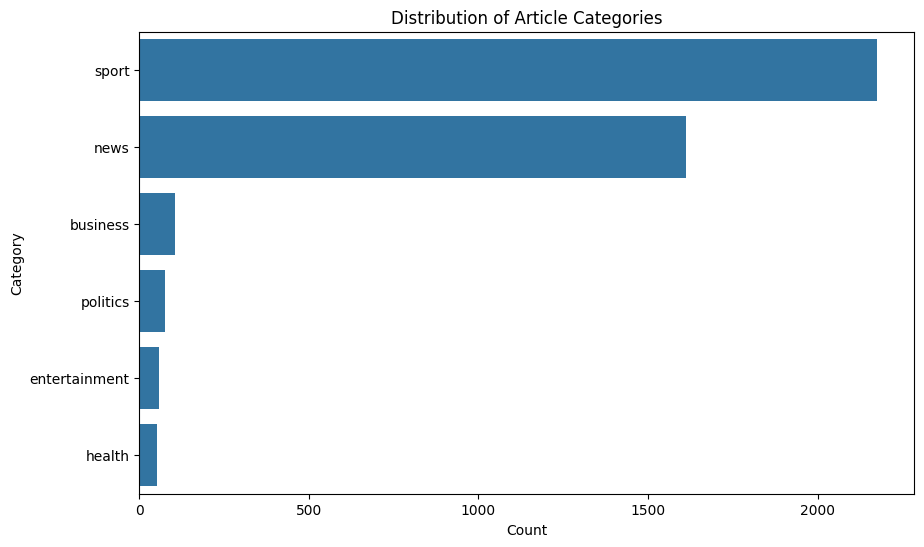

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=data, order = data['Category'].value_counts().index)
plt.title('Distribution of Article Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [ ]:
data.columns

Index(['Date published', 'Category', 'Section', 'Headline', 'Description',
       'Keywords', 'Article text'],
      dtype='object')

In [ ]:
data['Category'].value_counts(normalize=True)

,proportion
Category,
sport,0.533857
news,0.395240
business,0.025515
politics,0.018400
entertainment,0.014230
health,0.012758


In [ ]:
import re

def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
data['cleaned_text'] = data['Article text'].apply(remove_special_characters)

In [ ]:
data.loc[0:3, ['Article text','cleaned_text']]

Article text  \
0   (CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see more forms of transport set to transform the future.Hide Caption 1 of 13 Photos: Pictured here as a rendering, Oceanbird is a wind-powered transatlantic car carrier that cuts carbon emissions by 90%, compared to a standard car carrier.Hide Caption 2 of 13 Photos: It's not just maritime ships that are going green. Cities around the world are adopting electric ferries. Norwegian startup Zeabuz hopes its self-driving electric ferry (pictured here as a rendering) will help revive urban waterways.Hide Caption 3 of 13 Photos: In China, a new Maglev high-speed train rolls off the production line in Qingdao, east China's Shandong Province, on July 20. It has a top speed of 600 km per hour -- currently the fastest ground vehicle available globally. Hide Caption 4 of 13 Photos: Reaching speeds of up to 1,000 kilometers (620 miles) per hour, Hyperloop could be a sustainable replacement to short-haul flights. Dutch company Hardt (shown here as a rendering) started work on its Hyperloop test facility in Europe, anticipated to open in 2022.Hide Caption 5 of 13 Photos: Hyperloop is like a bullet train, without tracks and rails. Floating pods are propelled through a low-pressure steel tube using magnetic levitation. Virgin has been running tests with passengers on its XP-2 vehicle, pictured here.Hide Caption 6 of 13 Photos: Low carbon travel isn't just about switching to sustainable fuel sources -- it's also about redesigning the transport itself. A "Flying-V" plane designed by Delft's University of Technology in the Netherlands and Dutch airline KLM can cut fuel consumption by 20%. Ultimately, researchers hope to switch out the kerosene with a sustainable fuel source, like liquid hydrogen.Hide Caption 7 of 13 Photos: Hydrogen aviation could provide a sustainable solution for short and medium-haul flights. In September, Airbus unveiled plans for three hydrogen-powered, zero-emission aircraft which can carry 100 to 200 passengers. It hopes to launch the first ZEROe aircraft in 2035.Hide Caption 8 of 13 Photos: In December 2019, Canadian airline Harbour Air flew the world's first all-electric, zero-emission commercial aircraft. The six-seater seaplane was retrofitted with magniX's magni500 all-electric motor. Harbour Air -- which carries half a million passengers annually -- hopes to become the world's first all-electric airline. Hide Caption 9 of 13 Photos: In the case of electric bikes, the future is now: one retailer reported the sale of e-bikes and e-scooters had increased 230% this year. E-bikes give the user a boost to their pedaling, allowing them to go further with less effort. E-bikes are now even available on ride-share apps, like Uber.Hide Caption 10 of 13 Photos: While sleeper trains or buses might be the way most of us get some shut-eye on overnight travel, this rendering of a self-driving hotel suite from Toronto-based designer Steve Lee of Aprilli Design Studio might offer a plush alternative in the future.Hide Caption 11 of 13 Photos

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [ ]:
data.loc[0:3, ['Article text','cleaned_text']]

Article text  \
0   (CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see more forms of transport set to transform the future.Hide Caption 1 of 13 Photos: Pictured here as a rendering, Oceanbird is a wind-powered transatlantic car carrier that cuts carbon emissions by 90%, compared to a standard car carrier.Hide Caption 2 of 13 Photos: It's not just maritime ships that are going green. Cities around the world are adopting electric ferries. Norwegian startup Zeabuz hopes its self-driving electric ferry (pictured here as a rendering) will help revive urban waterways.Hide Caption 3 of 13 Photos: In China, a new Maglev high-speed train rolls off the production line in Qingdao, east China's Shandong Province, on July 20. It has a top speed of 600 km per hour -- currently the fastest ground vehicle available globally. Hide Caption 4 of 13 Photos: Reaching speeds of up to 1,000 kilometers (620 miles) per hour, Hyperloop could be a sustainable replacement to short-haul flights. Dutch company Hardt (shown here as a rendering) started work on its Hyperloop test facility in Europe, anticipated to open in 2022.Hide Caption 5 of 13 Photos: Hyperloop is like a bullet train, without tracks and rails. Floating pods are propelled through a low-pressure steel tube using magnetic levitation. Virgin has been running tests with passengers on its XP-2 vehicle, pictured here.Hide Caption 6 of 13 Photos: Low carbon travel isn't just about switching to sustainable fuel sources -- it's also about redesigning the transport itself. A "Flying-V" plane designed by Delft's University of Technology in the Netherlands and Dutch airline KLM can cut fuel consumption by 20%. Ultimately, researchers hope to switch out the kerosene with a sustainable fuel source, like liquid hydrogen.Hide Caption 7 of 13 Photos: Hydrogen aviation could provide a sustainable solution for short and medium-haul flights. In September, Airbus unveiled plans for three hydrogen-powered, zero-emission aircraft which can carry 100 to 200 passengers. It hopes to launch the first ZEROe aircraft in 2035.Hide Caption 8 of 13 Photos: In December 2019, Canadian airline Harbour Air flew the world's first all-electric, zero-emission commercial aircraft. The six-seater seaplane was retrofitted with magniX's magni500 all-electric motor. Harbour Air -- which carries half a million passengers annually -- hopes to become the world's first all-electric airline. Hide Caption 9 of 13 Photos: In the case of electric bikes, the future is now: one retailer reported the sale of e-bikes and e-scooters had increased 230% this year. E-bikes give the user a boost to their pedaling, allowing them to go further with less effort. E-bikes are now even available on ride-share apps, like Uber.Hide Caption 10 of 13 Photos: While sleeper trains or buses might be the way most of us get some shut-eye on overnight travel, this rendering of a self-driving hotel suite from Toronto-based designer Steve Lee of Aprilli Design Studio might offer a plush alternative in the future.Hide Caption 11 of 13 Photos

In [ ]:
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [ ]:
data.loc[0:3, ['Article text','cleaned_text']]

Article text  \
0   (CNN)Right now, there's a shortage of truck drivers in the US and worldwide, exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks, and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015, TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US, China and Europe. Although these are simply commercially available trucks retrofitted with its technology, TuSimple has deals in place with two of the world's largest truck manufacturers -- Navistar in the US and Traton, Volkswagen's trucking business, in Europe -- to design and build fully autonomous models, which it hopes to launch by 2024. Photos: The Yara Birkeland is what its builders call the world's first zero-emission, autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see more forms of transport set to transform the future.Hide Caption 1 of 13 Photos: Pictured here as a rendering, Oceanbird is a wind-powered transatlantic car carrier that cuts carbon emissions by 90%, compared to a standard car carrier.Hide Caption 2 of 13 Photos: It's not just maritime ships that are going green. Cities around the world are adopting electric ferries. Norwegian startup Zeabuz hopes its self-driving electric ferry (pictured here as a rendering) will help revive urban waterways.Hide Caption 3 of 13 Photos: In China, a new Maglev high-speed train rolls off the production line in Qingdao, east China's Shandong Province, on July 20. It has a top speed of 600 km per hour -- currently the fastest ground vehicle available globally. Hide Caption 4 of 13 Photos: Reaching speeds of up to 1,000 kilometers (620 miles) per hour, Hyperloop could be a sustainable replacement to short-haul flights. Dutch company Hardt (shown here as a rendering) started work on its Hyperloop test facility in Europe, anticipated to open in 2022.Hide Caption 5 of 13 Photos: Hyperloop is like a bullet train, without tracks and rails. Floating pods are propelled through a low-pressure steel tube using magnetic levitation. Virgin has been running tests with passengers on its XP-2 vehicle, pictured here.Hide Caption 6 of 13 Photos: Low carbon travel isn't just about switching to sustainable fuel sources -- it's also about redesigning the transport itself. A "Flying-V" plane designed by Delft's University of Technology in the Netherlands and Dutch airline KLM can cut fuel consumption by 20%. Ultimately, researchers hope to switch out the kerosene with a sustainable fuel source, like liquid hydrogen.Hide Caption 7 of 13 Photos: Hydrogen aviation could provide a sustainable solution for short and medium-haul flights. In September, Airbus unveiled plans for three hydrogen-powered, zero-emission aircraft which can carry 100 to 200 passengers. It hopes to launch the first ZEROe aircraft in 2035.Hide Caption 8 of 13 Photos: In December 2019, Canadian airline Harbour Air flew the world's first all-electric, zero-emission commercial aircraft. The six-seater seaplane was retrofitted with magniX's magni500 all-electric motor. Harbour Air -- which carries half a million passengers annually -- hopes to become the world's first all-electric airline. Hide Caption 9 of 13 Photos: In the case of electric bikes, the future is now: one retailer reported the sale of e-bikes and e-scooters had increased 230% this year. E-bikes give the user a boost to their pedaling, allowing them to go further with less effort. E-bikes are now even available on ride-share apps, like Uber.Hide Caption 10 of 13 Photos: While sleeper trains or buses might be the way most of us get some shut-eye on overnight travel, this rendering of a self-driving hotel suite from Toronto-based designer Steve Lee of Aprilli Design Studio might offer a plush alternative in the future.Hide Caption 11 of 13 Photos

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [ ]:
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

cleaned_text  \
0  cnn right now there s a shortage of truck drivers in the us and worldwide exacerbated by the e commerce boom brought on by the pandemic one solution to the problem is autonomous trucks and several companies are in a race to be the first to launch one among them is san diego based tusimple founded in 2015 tusimple has completed about 2 million miles of road tests with its 70 prototype trucks across the us china and europe although these are simply commercially available trucks retrofitted with its technology tusimple has deals in place with two of the world s largest truck manufacturers navistar in the us and traton volkswagen s trucking business in europe to design and build fully autonomous models which it hopes to launch by 2024 photos the yara birkeland is what its builders call the world s first zero emission autonomous cargo ship the ship is scheduled to make its first journey between two norwegian towns before the end of the year click through to see more forms of transport set to transform the future hide caption 1 of 13 photos pictured here as a rendering oceanbird is a wind powered transatlantic car carrier that cuts carbon emissions by 90 compared to a standard car carrier hide caption 2 of 13 photos it s not just maritime ships that are going green cities around the world are adopting electric ferries norwegian startup zeabuz hopes its self driving electric ferry pictured here as a rendering will help revive urban waterways hide caption 3 of 13 photos in china a new maglev high speed train rolls off the production line in qingdao east china s shandong province on july 20 it has a top speed of 600 km per hour currently the fastest ground vehicle available globally hide caption 4 of 13 photos reaching speeds of up to 1 000 kilometers 620 miles per hour hyperloop could be a sustainable replacement to short haul flights dutch company hardt shown here as a rendering started work on its hyperloop test facility in europe anticipated to open in 2022 hide caption 5 of 13 photos hyperloop is like a bullet train without tracks and rails floating pods are propelled through a low pressure steel tube using magnetic levitation virgin has been running tests with passengers on its xp 2 vehicle pictured here hide caption 6 of 13 photos low carbon travel isn t just about switching to sustainable fuel sources it s also about redesigning the transport itself a flying v plane designed by delft s university of technology in the netherlands and dutch airline klm can cut fuel consumption by 20 ultimately researchers hope to switch out the kerosene with a sustainable fuel source like liquid hydrogen hide caption 7 of 13 photos hydrogen aviation could provide a sustainable solution for short and medium haul flights in september airbus unveiled plans for three hydrogen powered zero emission aircraft which can carry 100 to 200 passengers it hopes to launch the first zeroe aircraft in 2035 hide caption 8 of 13 photos in december 2019 canadian airline harbour air flew the world s first all electric zero emission commercial aircraft the six seater seaplane was retrofitted with magnix s magni500 all electric motor harbour air which carries half a million passengers annually hopes to become the world s first all electric airline hide caption 9 of 13 photos in the case of electric bikes the future is now one retailer reported the sale of e bikes and e scooters had increased 230 this year e bikes give the user a boost to their pedaling allowing them to go further with less effort e bikes are now even available on ride share apps like uber hide caption 10 of 13 photos while sleeper trains or buses might be the way most of us get some shut eye on overnight travel this rendering of a self driving hotel suite from toronto based designer steve lee of aprilli design studio might offer a plush alternative in the future hide caption 11 of 13 photos in the uae these futuristic looking pods are undergoing testing on a 400 meter line in sharja

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def apply_lemmatization(text):
    words = text.split()
    new_text =' '.join([lemmatizer.lemmatize(word) for word in words])
    return new_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_lemmatization)


In [ ]:
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

cleaned_text_without_stopwords  \
0  cnn right shortage truck drivers us worldwide exacerbated e commerce boom brought pandemic one solution problem autonomous trucks several companies race first launch one among san diego based tusimple founded 2015 tusimple completed 2 million miles road tests 70 prototype trucks across us china europe although simply commercially available trucks retrofitted technology tusimple deals place two world largest truck manufacturers navistar us traton volkswagen trucking business europe design build fully autonomous models hopes launch 2024 photos yara birkeland builders call world first zero emission autonomous cargo ship ship scheduled make first journey two norwegian towns end year click see forms transport set transform future hide caption 1 13 photos pictured rendering oceanbird wind powered transatlantic car carrier cuts carbon emissions 90 compared standard car carrier hide caption 2 13 photos maritime ships going green cities around world adopting electric ferries norwegian startup zeabuz hopes self driving electric ferry pictured rendering help revive urban waterways hide caption 3 13 photos china new maglev high speed train rolls production line qingdao east china shandong province july 20 top speed 600 km per hour currently fastest ground vehicle available globally hide caption 4 13 photos reaching speeds 1 000 kilometers 620 miles per hour hyperloop could sustainable replacement short haul flights dutch company hardt shown rendering started work hyperloop test facility europe anticipated open 2022 hide caption 5 13 photos hyperloop like bullet train without tracks rails floating pods propelled low pressure steel tube using magnetic levitation virgin running tests passengers xp 2 vehicle pictured hide caption 6 13 photos low carbon travel switching sustainable fuel sources also redesigning transport flying v plane designed delft university technology netherlands dutch airline klm cut fuel consumption 20 ultimately researchers hope switch kerosene sustainable fuel source like liquid hydrogen hide caption 7 13 photos hydrogen aviation could provide sustainable solution short medium haul flights september airbus unveiled plans three hydrogen powered zero emission aircraft carry 100 200 passengers hopes launch first zeroe aircraft 2035 hide caption 8 13 photos december 2019 canadian airline harbour air flew world first electric zero emission commercial aircraft six seater seaplane retrofitted magnix magni500 electric motor harbour air carries half million passengers annually hopes become world first electric airline hide caption 9 13 photos case electric bikes future one retailer reported sale e bikes e scooters increased 230 year e bikes give user boost pedaling allowing go less effort e bikes even available ride share apps like uber hide caption 10 13 photos sleeper trains buses might way us get shut eye overnight travel rendering self driving hotel suite toronto based designer steve lee aprilli design studio might offer plush alternative future hide caption 11 13 photos uae futuristic looking pods undergoing testing 400 meter line sharjah borders dubai belarus based usky transport says pods help cities solve traffic problems hide caption 12 13 photos coradia ilint french rail transport company alstom world first hydrogen powered passenger train began testing germany 2018 september 2020 entered regular service austria hide caption 13 13no sleeptusimple latest road test involved hauling fresh produce 951 miles nogales arizona oklahoma city pickup dropoff handled human driver bulk route tucson dallas truck drove read today system fully ready safety driver safety engineer board times testing drove full autonomy driver touching wheel said cheng lu tusimple president ceo journey completed 14 hours versus usual 24 human driver mostly truck need sleep us driver work 11 hours day simply handoff first pair drivers stop reached 11 hours operation said lu course negates advantage autonomous system 

In [ ]:
bow_vec = CountVectorizer(max_features = 1000)

# Applying CountVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()


# Shape of the feature vector
print("Shape of the feature vector",data_features_BOW.shape)

# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

print("first 10 words",words[:10])
print("last 10 words",words[-10:])

# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()


Shape of the feature vector (4076, 1000)
first 10 words ['000' '10' '100' '11' '12' '13' '14' '15' '16' '17']
last 10 words ['worked' 'worker' 'working' 'world' 'would' 'wrote' 'year' 'yet' 'york'
 'young']


,000,10,100,11,12,13,14,15,16,17,...,worked,worker,working,world,would,wrote,year,yet,york,young
0,10,2,1,4,1,13,1,1,0,0,...,0,2,2,6,0,0,5,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,7,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,1,0,0,...,0,1,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Prepare data for Word2Vec by tokenizing the cleaned text
tokenized_text = data['final_cleaned_text'].apply(lambda x: x.split())

In [ ]:
# Train Word2Vec Skip-gram model
# sg: Defines the training algorithm. If 1, Skip-gram is employed; otherwise, CBOW is used.
# min_count: Ignores all words with total frequency lower than this.
# vector_size: Dimensionality of the word vectors.
# workers: Use these many worker threads to train the model (=faster training with multicore CPUs).
skipgram_model = Word2Vec(tokenized_text, min_count=1, vector_size=100, workers=4, sg=1)

# Summarize the loaded model
print(skipgram_model)

# Summarize vocabulary
words = list(skipgram_model.wv.index_to_key)
print(words[:10])

# Access vector for one word
print(skipgram_model.wv['sport'])

# Save model
# skipgram_model.save('skipgram_model.bin')
# Load model
# new_model = Word2Vec.load('skipgram_model.bin')
# print(new_model)

Word2Vec<vocab=64852, vector_size=100, alpha=0.025>
['said', 'year', 'cnn', 'one', 'people', 'photo', 'say', 'time', 'first', 'would']
[-0.07806318  0.02090351  0.44133136 -0.05297133  0.3755158  -1.1365566
 -0.17927867 -0.09154779  0.39841956 -0.5559734   0.55094254 -0.39154297
  0.25265345  0.09266557  0.3282965   0.04434574  0.07172713 -0.16984488
 -0.35484582 -0.570099    0.17754245  0.24075343 -0.12389554 -0.38737574
  0.7994572  -0.85887545 -0.19488987  0.17964777 -0.24218966  0.62038225
  0.08144791  0.10558866 -0.07305071 -0.3031271  -0.47734693 -0.3131578
  0.11652107 -0.30148712 -0.0301986  -0.94285625 -0.08972922 -0.96394885
  0.62949145 -0.41824487  0.458915   -0.41976103 -0.02663469  0.1501159
  0.05364146  0.17968297  0.51193255 -0.10531326  0.7359353  -0.22318397
 -0.2721197   0.32931    -0.45799303  0.08230095  0.18146934  0.21894602
  0.474001   -0.20849694  0.04738866 -0.09198441 -0.15984653 -0.41092432
 -0.16204529  0.01043293  0.34140566  0.82810557 -0.50091666  0.9

In [ ]:
# Train Word2Vec CBOW model
# min_count: Ignores all words with total frequency lower than this.
# vector_size: Dimensionality of the word vectors.
# workers: Use these many worker threads to train the model (=faster training with multicore CPUs).
# cbow_mean: If 0, use the sum of the context word vectors. If 1 (default), use the mean.
cbow_model = Word2Vec(tokenized_text, min_count=1, vector_size=100, workers=4, cbow_mean=1)

# Summarize the loaded model
print(cbow_model)

# Summarize vocabulary
words = list(cbow_model.wv.index_to_key)
print(words[:10])

# Access vector for one word
print(cbow_model.wv['sport'])

# Save model
# cbow_model.save('cbow_model.bin')
# Load model
# new_model = Word2Vec.load('cbow_model.bin')
# print(new_model)

Word2Vec<vocab=64852, vector_size=100, alpha=0.025>
['said', 'year', 'cnn', 'one', 'people', 'photo', 'say', 'time', 'first', 'would']
[-0.027669    1.8352703   0.7385974  -0.15992056  1.1877196  -1.4317923
 -2.1903415   0.9142      1.7779639  -0.9822296   0.48634273 -2.1982691
  1.8018341   0.29661396  0.08849689  0.4747172  -0.01809754 -2.9334652
 -0.17360155  0.3651874  -2.1425886   2.0779924   0.5828982  -2.1547818
  1.0562729  -0.4685608  -0.48951137 -0.13285422  0.20431802  0.6686406
  1.0323384  -1.6644851   1.0022957  -0.8490456  -0.54962873 -1.6511827
  0.7016952  -0.53249854  0.838822   -1.4227499   0.91434896 -1.8791416
 -0.04133839  0.58621496  1.2692205   1.5147574   1.3785977  -2.1232758
 -0.88336605  0.4694068   2.0707617  -0.796796    2.068541   -1.2804812
 -2.463916    4.292925   -0.7340536   1.4360558   0.6281944  -1.8710673
  1.485663   -0.5136867  -0.5481396  -0.72595835  0.8192298   0.50627565
  1.7827439  -0.9169621   1.0109525   3.355282   -1.2710451   0.24796237

In [ ]:
# Step 5 — Apply to dataset

# CBOW Vectors
data_cbow_vectors = np.array([get_sentence_vector(cbow_model, tokens) for tokens in sentences])
# Skip-gram Vectors
data_skipgram_vectors = np.array([get_sentence_vector(skipgram_model, tokens) for tokens in sentences])

# Step 6 — Convert to DataFrames (optional)
df_cbow = pd.DataFrame(data_cbow_vectors)
df_skipgram = pd.DataFrame(data_skipgram_vectors)

In [ ]:
def get_sentence_vector(model, tokens):
    word_vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)  # handle empty sentences
    return np.mean(word_vecs, axis=0)

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np


# Step 1 — Tokenize the text
sentences = data['final_cleaned_text'].apply(lambda x: x.split())  # assuming text is already cleaned

# Step 2 — Train CBOW Model (sg=0)
cbow_model = Word2Vec(
    sentences,
    vector_size=100,  # length of each word vector
    window=3,         # context window size
    min_count=5,      # include all words
    sg=0,             # CBOW
    workers=4         # CPU cores to use
)

# Step 3 — Train Skip-gram Model (sg=1)
skipgram_model = Word2Vec(
    sentences,
    vector_size=100,
    window=3,
    min_count=5,
    sg=1,             # Skip-gram
    workers=4
)

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
# filename = r"C:\Users\ACER\Downloads\glove.6B" # Original local path
# Assuming the file is in your Google Drive, update the path below
filename = r'C:\Users\ACER\Downloads\glove.6B' # Replace with the actual path

glove_model = None
from gensim.models import KeyedVectors

# GloVe text files do NOT contain a header line with vocab_size & vector_size
# Using direct load with no_header for simplicity.
try:
    glove_model = KeyedVectors.load_word2vec_format(filename, no_header=True, binary=False)
    print("Loaded GloVe vectors:")
    print(f"Vocab size: {len(glove_model.index_to_key)} | Vector size: {glove_model.vector_size}")
    # Quick  check on a common token if present
    sample_token = 'the'
    if sample_token in glove_model:
        print(f"Vector sample for '{sample_token}' : {glove_model[sample_token][:5]}")
    # Checking top 5 similar words to the word 'book' by GloVe model
    print("word embedding of word book", glove_model["book"])
    print("GloVe:", glove_model.similar_by_word("book", topn=5))
except Exception as e:
    print("Failed to load GloVe embeddings:", e)
    print("If this persists, you can convert first using gensim.scripts.glove2word2vec.glove2word2vec().")

Failed to load GloVe embeddings: Unable to handle scheme 'c', expected one of ('', 'file', 'ftp', 'ftps', 'gs', 'hdfs', 'http', 'https', 'viewfs', 'webhdfs'). Extra dependencies required by 'c' may be missing. See <https://github.com/piskvorky/smart_open/blob/master/README.rst> for details.
If this persists, you can convert first using gensim.scripts.glove2word2vec.glove2word2vec().


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of datasets and their labels
vectorized_datasets = [
    ("BoW", df_BOW),
     ("GloVe", df_glove),
    ("word2Vec_cbow",df_cbow),
    ("skipgram",df_skipgram)
]

# Your target variable
y = data['Sentiment']

# Store results
results = []

# Loop over each dataset and train both classifiers
for name, X in vectorized_datasets:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
  rf_model = RandomForestClassifier(random_state=100)
  rf_model.fit(X_train, y_train)
  rf_preds = rf_model.predict(X_test)
  rf_f1 = f1_score(y_test, rf_preds, average='macro')
  results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # Random Forest
  rf_model = RandomForestClassifier(random_state=100)
  rf_model.fit(X_train, y_train)
  rf_preds = rf_model.predict(X_test)
  rf_f1 = f1_score(y_test, rf_preds, average='macro')
  results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))
results.sort(key=lambda x: x[1], reverse=True)

# Print all F1 scores
print("\n📊 Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")



NameError: name 'df_glove' is not defined